![Logo Universidad Politécnica Salesiana](./logo_ups.png)
## Carrera de Ingeniería en Ciencias de la Computación
### Tarea: Anscombe y DataSaurus
#### Periodo: 2024
#### Estudiante: Sebastian Andrade
### Descripción

Este cuaderno de Jupyter contiene el análisis del **cuarteto de Anscombe** y el **DataSaurus Dozen**. Ambos datasets son ejemplos clásicos que ilustran la importancia de visualizar los datos más allá de sus estadísticas resumidas, ya que gráficamente pueden presentar patrones inesperados.

In [2]:
# Instalar bibliotecas (si no están instaladas)
!pip install seaborn matplotlib pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### 1. Cargar el dataset de DataSaurus

In [8]:
import pandas as pd

# Cargar el dataset DataSaurus desde el enlace
url_datasaurus = 'https://raw.githubusercontent.com/perlatex/R_for_Data_Science/master/demo_data/datasaurus.csv'
data_saurus = pd.read_csv(url_datasaurus)

# Mostrar los primeros datos para confirmar la carga
print(data_saurus.head())


  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333


### 2. Resúmenes estadísticos de DataSaurus

In [9]:
import numpy as np

# Resúmenes estadísticos de DataSaurus
summary_saurus = data_saurus.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std'],
    'x': lambda x: np.corrcoef(data_saurus.loc[x.index, 'x'], data_saurus.loc[x.index, 'y'])[0, 1]
}).rename(columns={'<lambda>': 'corr_x_y'})

# Mostrar los resúmenes estadísticos
print(summary_saurus)


                   x          y           
            corr_x_y       mean        std
dataset                                   
away       -0.064128  47.834721  26.939743
bullseye   -0.068586  47.830823  26.935727
circle     -0.068343  47.837717  26.930036
dino       -0.064472  47.832253  26.935403
dots       -0.060341  47.839829  26.930192
h_lines    -0.061715  47.830252  26.939876
high_lines -0.068504  47.835450  26.939998
slant_down -0.068980  47.835896  26.936105
slant_up   -0.068609  47.831496  26.938608
star       -0.062961  47.839545  26.930275
v_lines    -0.069446  47.836988  26.937684
wide_lines -0.066575  47.831602  26.937902
x_shape    -0.065583  47.839717  26.930002


### 3. Graficar los datasets de DataSaurus

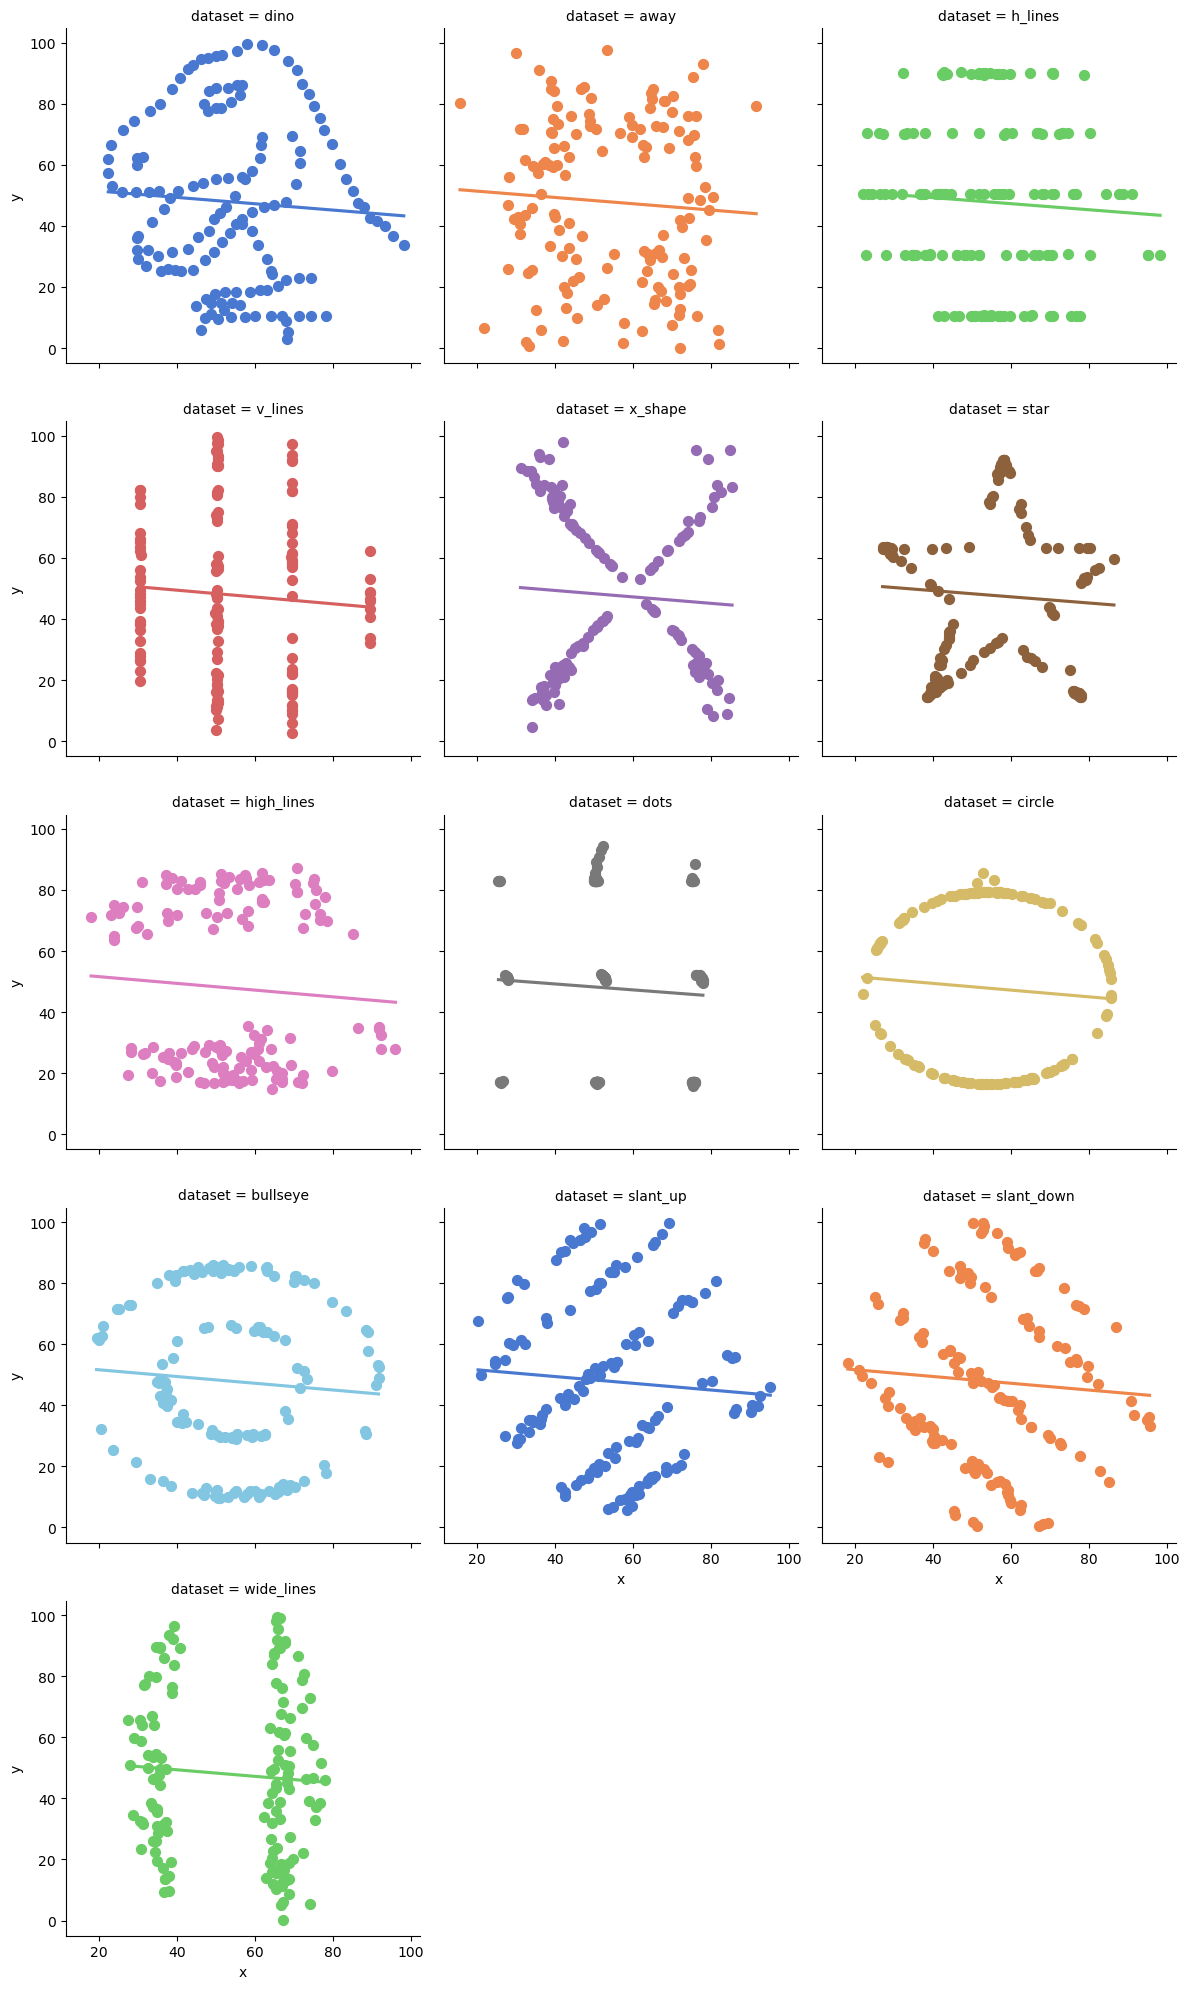

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar los datasets de DataSaurus
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=data_saurus, 
           col_wrap=3, ci=None, palette='muted', height=4, 
           scatter_kws={"s": 50, "alpha": 1})
plt.show()


### 4. Regresión lineal en el dataset "away"

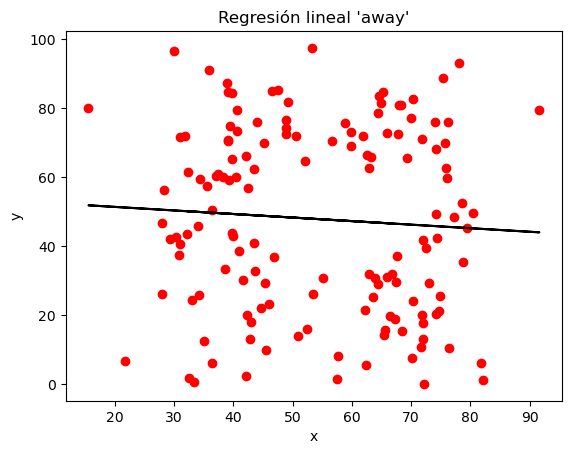

In [11]:
from sklearn.linear_model import LinearRegression

# Filtrar el dataset 'away' de DataSaurus
away_data = data_saurus[data_saurus['dataset'] == 'away']

# Definir X e Y
X = away_data[['x']]
y = away_data['y']

# Crear el modelo de regresión lineal y ajustarlo
model = LinearRegression()
model.fit(X, y)

# Realizar las predicciones
y_pred = model.predict(X)

# Graficar los puntos y la línea de regresión
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='black')
plt.title("Regresión lineal 'away'")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
